<a href="https://colab.research.google.com/github/RileyWClarke/MLTSA_RClarke/blob/master/HW2/rclarke_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLTSA - Riley Clarke - HW2

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
import os
import glob
from google.colab import drive
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
%matplotlib inline

In [0]:
#Making figures look nice:
plt.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# Reading in data via Kaggle API:

In [8]:
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
!pwd

/content


In [10]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [11]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [14]:
!kaggle datasets list -s stock

ref                                                       title                                           size  lastUpdated          downloadCount  
--------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
borismarjanovic/price-volume-data-for-all-us-stocks-etfs  Huge Stock Market Dataset                      492MB  2017-11-16 14:53:29          49631  
dgawlik/nyse                                              New York Stock Exchange                         31MB  2017-02-22 10:18:25          37649  
camnugent/sandp500                                        S&P 500 stock data                              19MB  2018-02-10 03:15:53          24700  
aaron7sun/stocknews                                       Daily News for Stock Market Prediction           6MB  2019-11-13 18:22:52          28302  
rpaguirre/tesla-stock-price                               Tesla Stock Price                               

In [0]:
#!mkdir tss

In [15]:
cd tss

/content/gdrive/My Drive/tss


In [0]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [16]:
cd data

/content/gdrive/My Drive/tss/data


In [17]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

price-volume-data-for-all-us-stocks-etfs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

In [18]:
cd Stocks

/content/gdrive/My Drive/tss/data/Stocks


In [0]:
alltss = []
 
bigfile = np.sort(np.array(glob.glob("*.txt")))

In [20]:
print(bigfile, len(bigfile))

['a.us.txt' 'aa.us.txt' 'aaap.us.txt' ... 'zx.us.txt' 'zyme.us.txt'
 'zyne.us.txt'] 7195


In [23]:
#Iteratively merge the first 10 .txt files into a single pandas dataframe named tss
tss = pd.read_csv(bigfile[0], usecols=['Date','Close']).rename({"Close" : "a.us"}, axis=1)

for filename in bigfile[1:11]:
  #print(filename)
  tss = tss.merge(pd.read_csv(filename, usecols=['Date','Close']).rename({"Close":filename[:-4]}, axis=1), on='Date')

print(tss)

aa.us.txt
aaap.us.txt
aaba.us.txt
aac.us.txt
aal.us.txt
aamc.us.txt
aame.us.txt
aan.us.txt
aaoi.us.txt
aaon.us.txt
           Date    a.us   aa.us  aaap.us  ...  aame.us  aan.us  aaoi.us  aaon.us
0    2015-11-11  36.901  17.779    24.50  ...   4.7960  24.649    16.76   24.252
1    2015-11-12  36.734  17.206    25.00  ...   4.8951  24.182    16.11   23.652
2    2015-11-13  36.030  17.581    25.26  ...   4.6672  23.795    16.60   23.110
3    2015-11-16  36.577  18.242    25.02  ...   4.8455  23.923    16.93   23.130
4    2015-11-17  37.607  18.197    24.62  ...   4.9150  23.418    16.68   23.268
..          ...     ...     ...      ...  ...      ...     ...      ...      ...
442  2017-11-02  68.130  47.460    81.00  ...   3.6500  35.800    39.28   34.350
443  2017-11-03  68.370  47.120    80.99  ...   3.6000  36.430    37.82   34.450
444  2017-11-07  68.250  46.970    81.00  ...   3.4000  34.440    37.89   34.600
445  2017-11-09  67.470  43.330    81.00  ...   3.5000  35.620    43.20   3

In [24]:
#Restructure tss to be indexed by date
tss.set_index('Date', inplace=True)
tss

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us,aaon.us
Date,,,,,,,,,,,
2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76,24.252
2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11,23.652
2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60,23.110
2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93,23.130
2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68,23.268
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-02,68.130,47.460,81.00,70.51,10.02,47.257,88.00,3.6500,35.800,39.28,34.350
2017-11-03,68.370,47.120,80.99,70.23,10.08,47.346,80.40,3.6000,36.430,37.82,34.450
2017-11-07,68.250,46.970,81.00,72.22,11.07,46.358,81.00,3.4000,34.440,37.89,34.600


In [25]:
print ("shape of the dataset:", tss.shape)

shape of the dataset: (447, 11)


#  Data Inspection

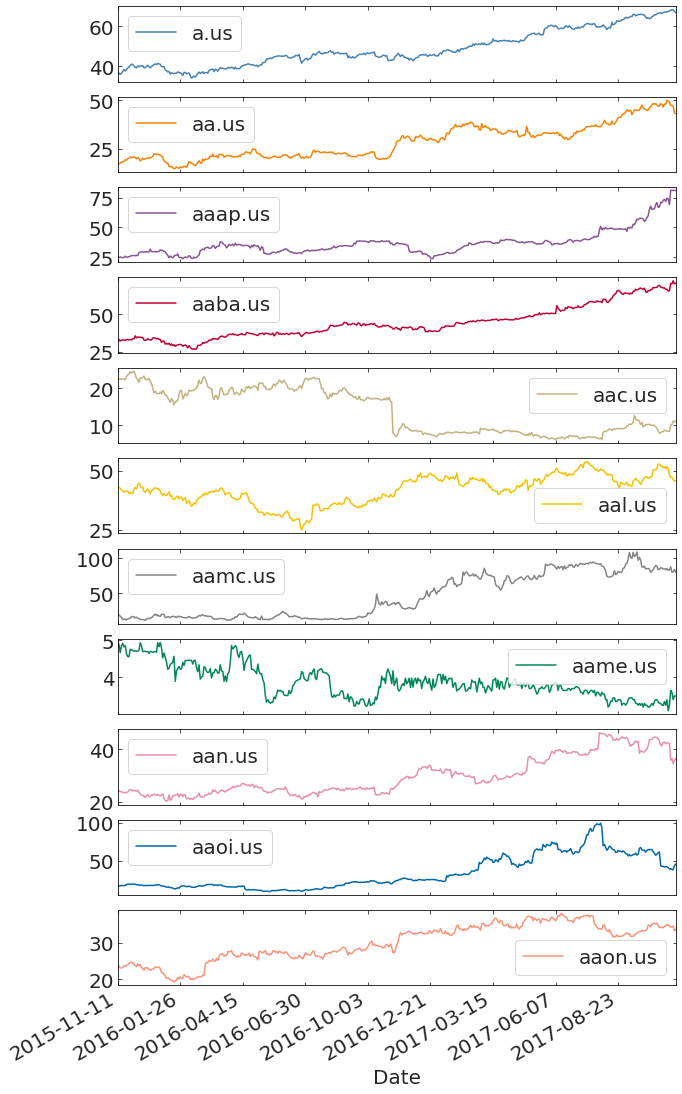

In [104]:
ts = tss.plot(subplots=True, figsize=(10,20))

Figure 1: The first 10 times series in the Kaggle stock volume dataset. Closing price is the exogenous variable.

## Correlations

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


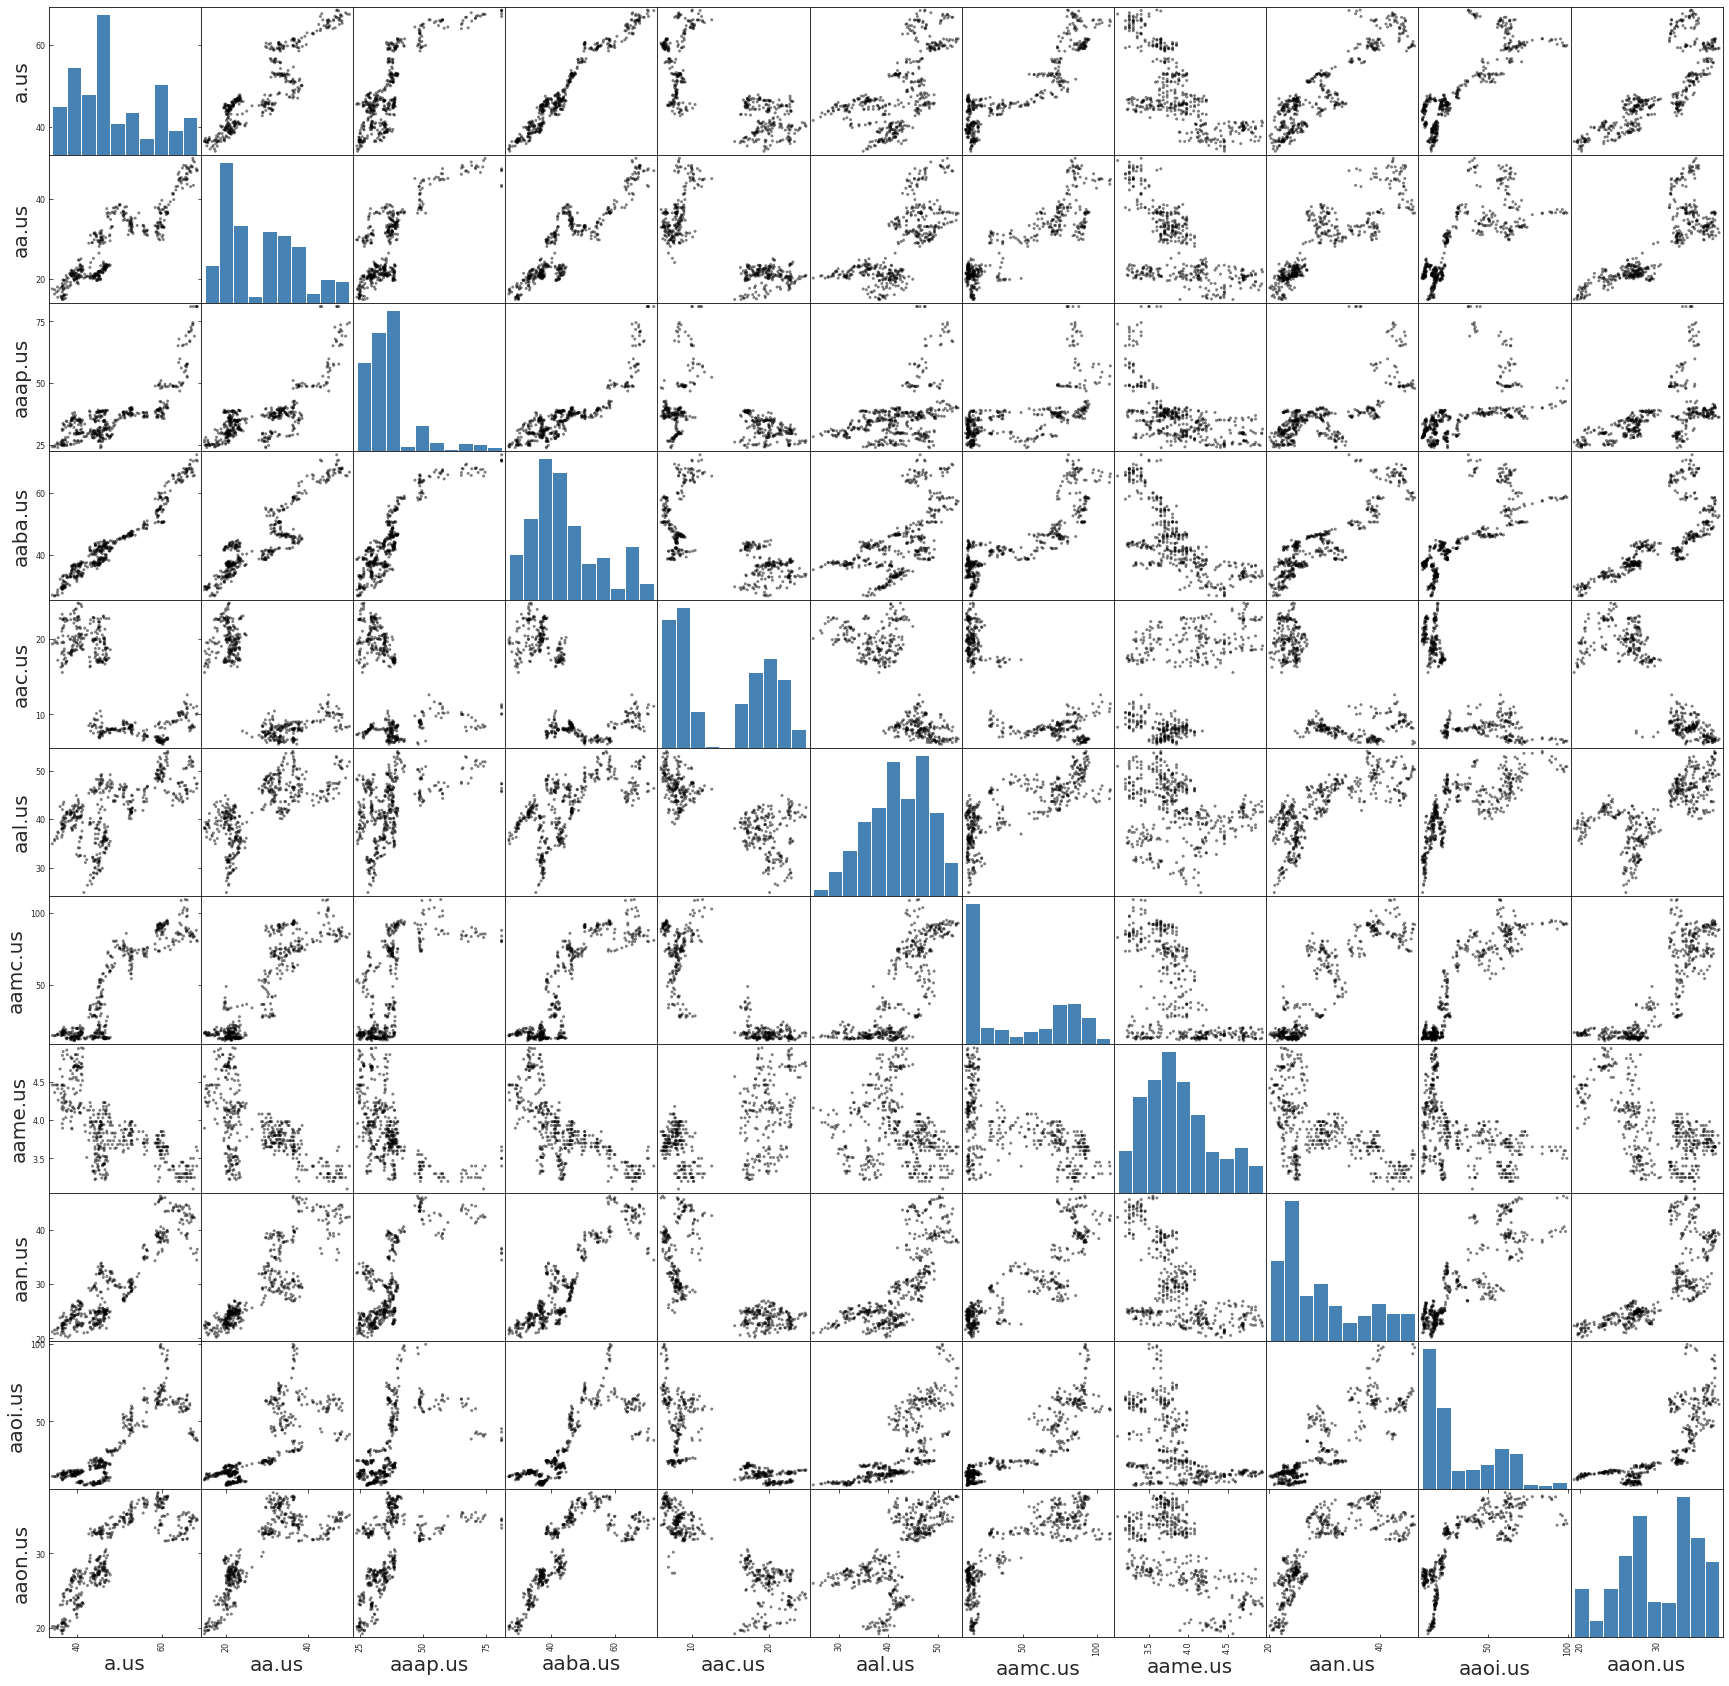

In [0]:
from pandas.plotting import scatter_matrix  

smatrix = scatter_matrix(tss, figsize = (30,30), c='k')

Figure 2: Scatter matrix for the 10 series shown in Figure 1. Each matrix element $M_{ij}$ shows how correlated the i-th variable is with the j-th variable. For example, we can see that "a.us" and "aaba.us" are highly correlated from the high linearity of the scatter plot, whereas the "aal.us" and "aame.us" are quite uncorrelated, with their scatter plot appearing much more randomly distributed. Each variable is of course perfectly correlated with itself, so the output simply displays a histogram of that variable.

In [0]:
#Displays the correlation values in matrix form
tss.corr()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us,aaon.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239,0.809409
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459,0.809966
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427,0.503524
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059,0.755263
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147,-0.876358
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505,0.671816
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166,0.853182
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371,-0.612453
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847,0.765596
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000,0.780400


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


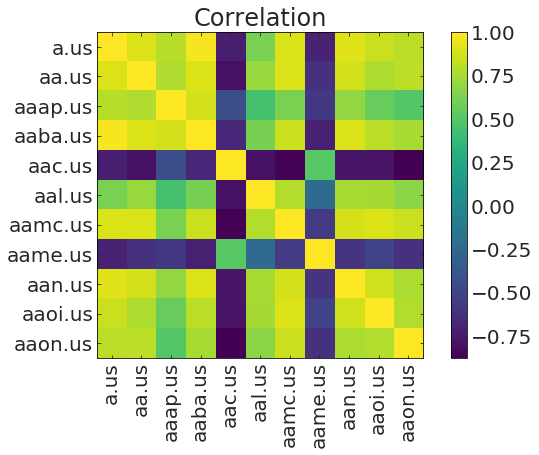

In [0]:
plt.imshow(tss.corr())
plt.colorbar()
plt.title('Correlation')
plt.yticks(np.arange(11),tss.columns)
plt.xticks(np.arange(11),tss.columns, rotation=90)
plt.show()

Figure 3: Heat map of the correlation values produced by by tss.corr()

## Testing for Stationarity


We can use statsmodels.tsa.stattools.adfuller() to test the stock timeseries for stationarity for a given threshold (0.05 in this case):

In [0]:
threshold = 0.05
statbool = [] #saving a list of stationary booleans for later
for c in tss.columns:
  print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)
  statbool.append(sm.tsa.stattools.adfuller(tss[c])[1] < threshold)

print(statbool)

a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False
aaon.us is stationary: False
[False, False, False, False, False, False, False, True, False, False, False]


Only the aame.us series appears to be stationary, meaning its mean and variance are not significantly different at different points in time.

## Plotting Autocorrelation & Partial Autocrrelation

The autocorrelation function (ACF) shows how correlated a series is with itself, when shifted a particular number of steps in time. The partial autocorrelation function (PACF) performs the autocorrelation on the residuals, after removing dependencies on other variables that induce correlation. 

Stationary series are plotted in red, non-stationary in blue

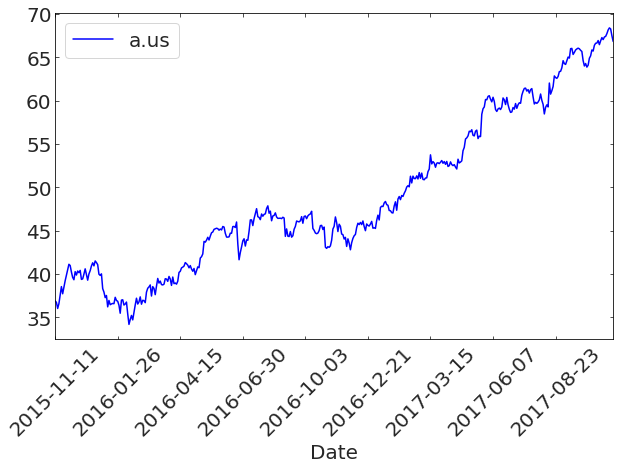

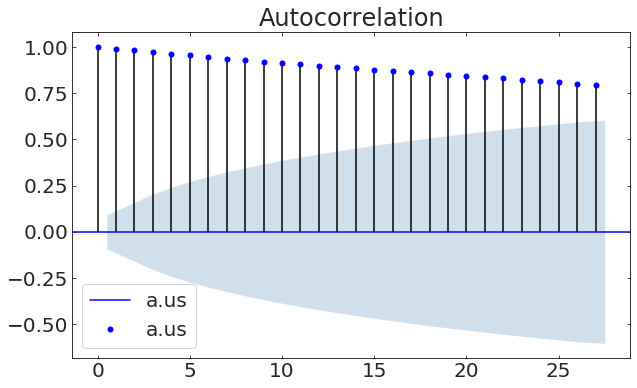

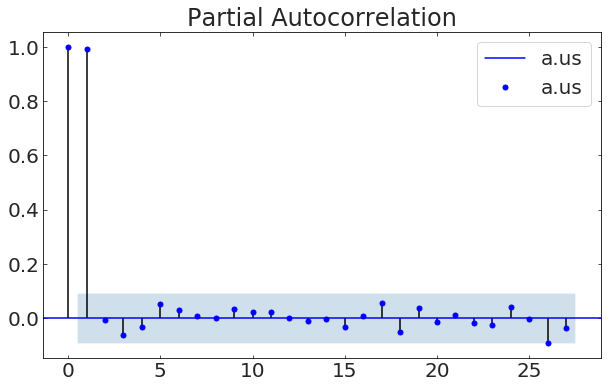

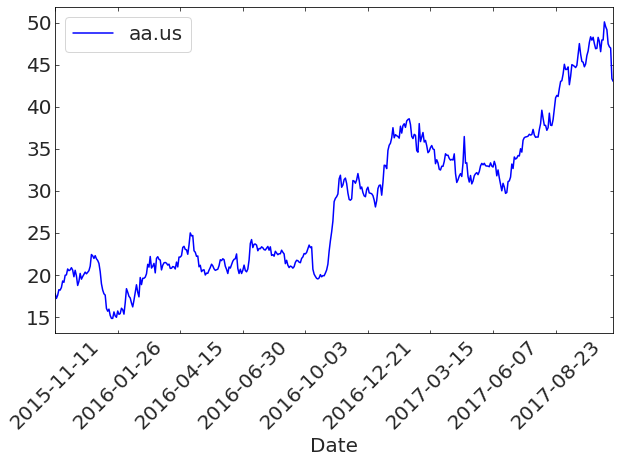

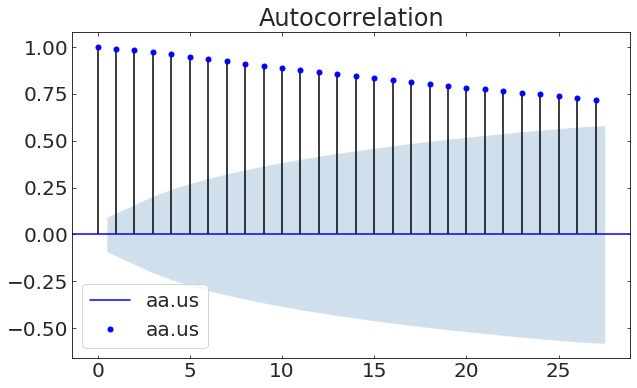

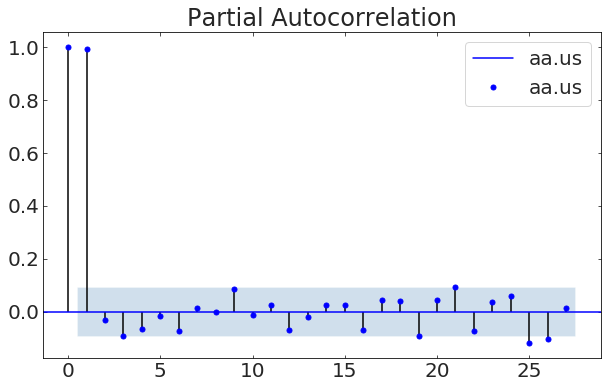

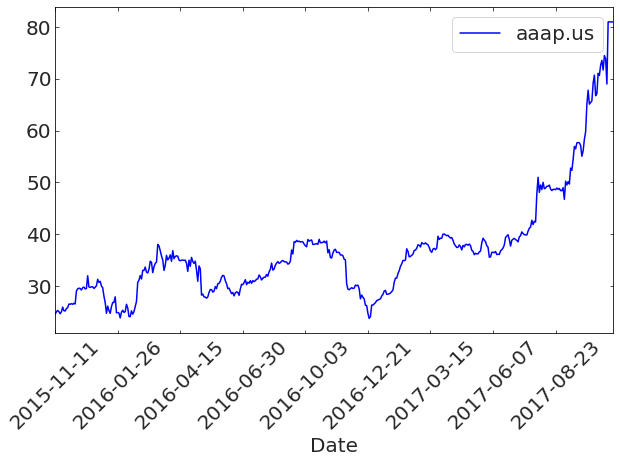

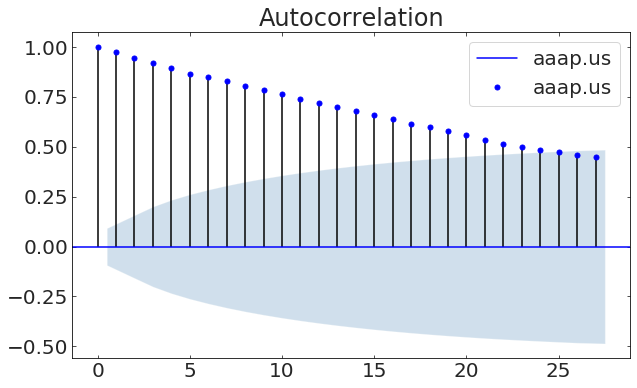

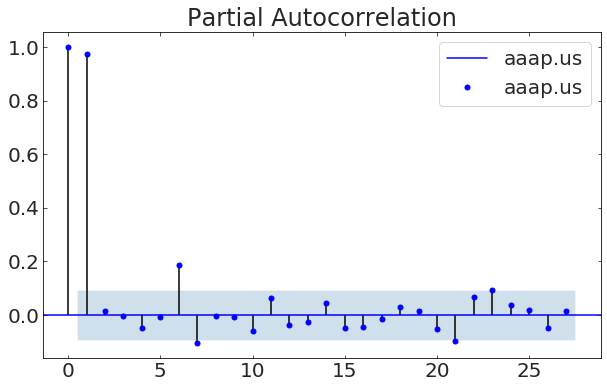

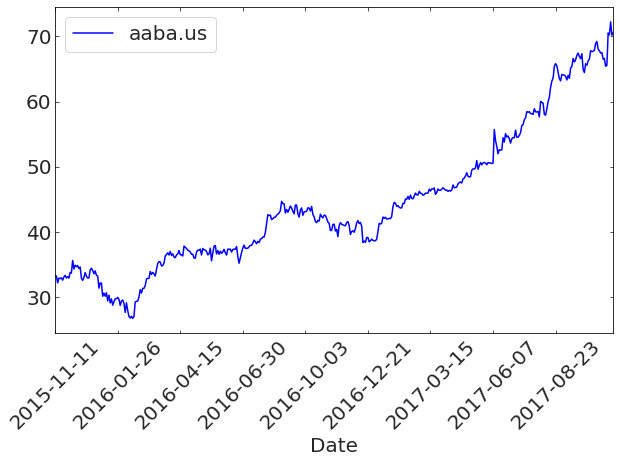

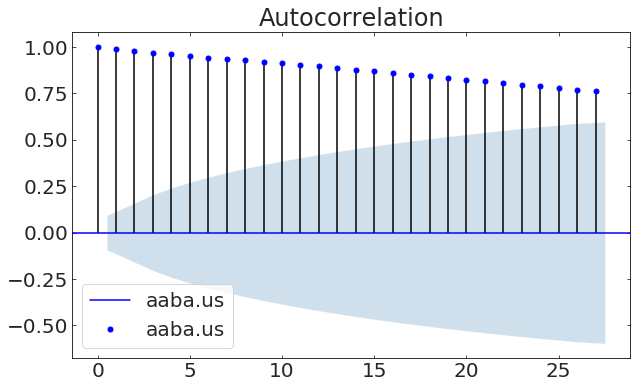

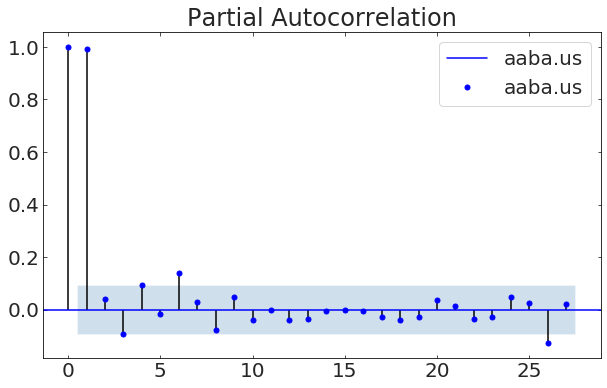

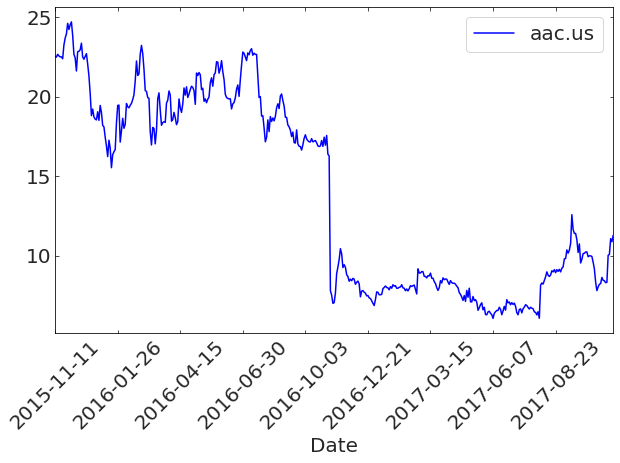

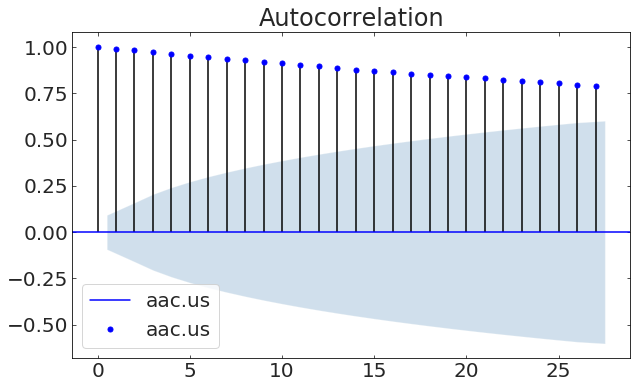

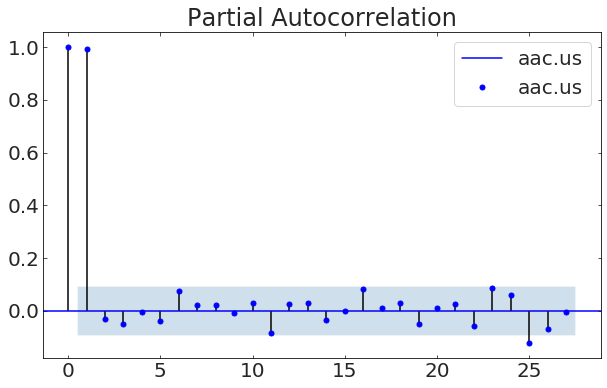

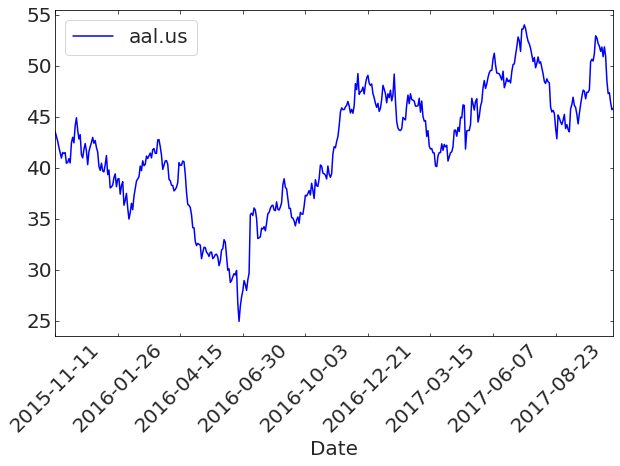

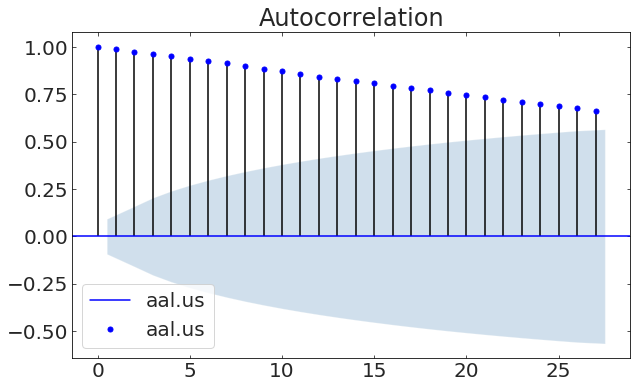

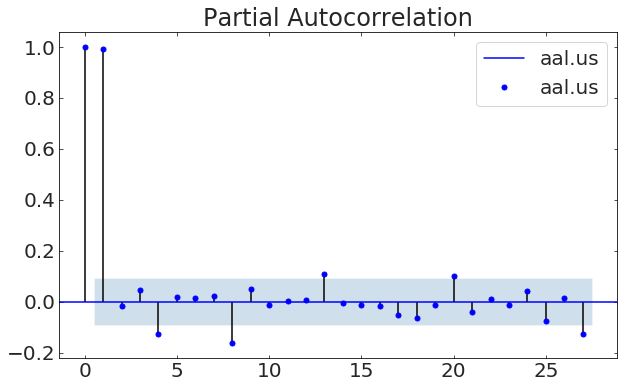

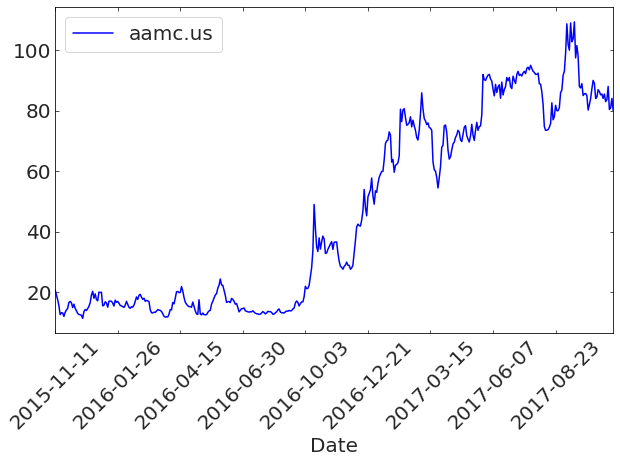

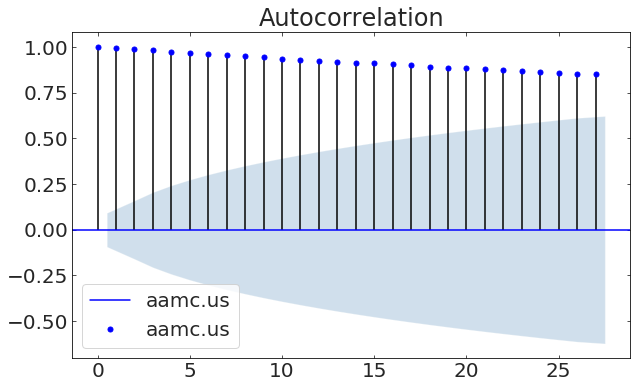

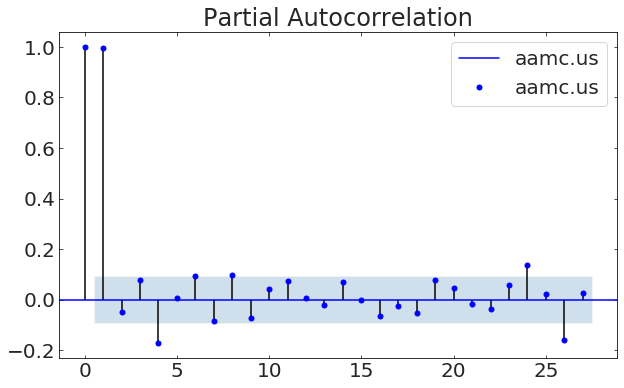

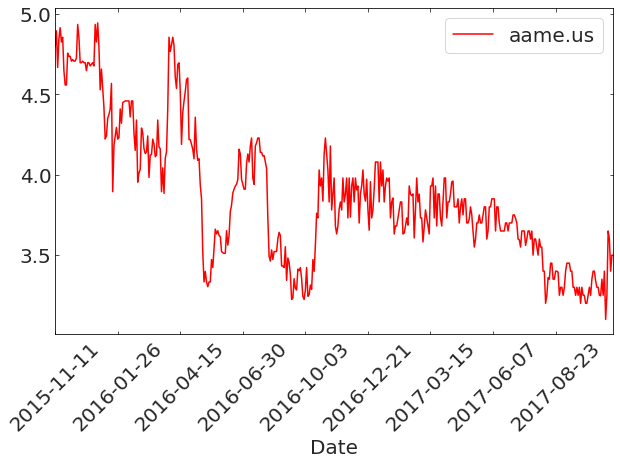

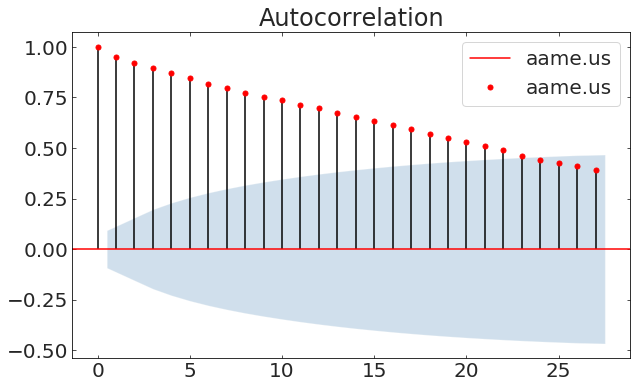

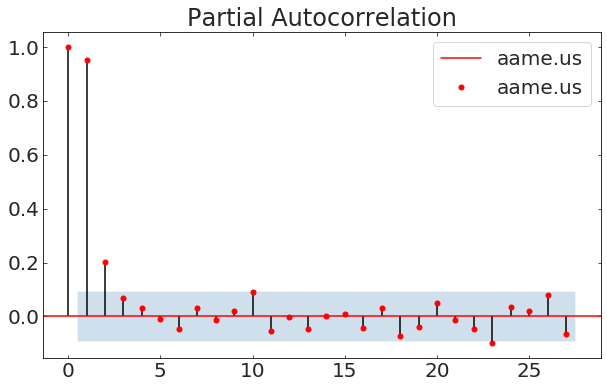

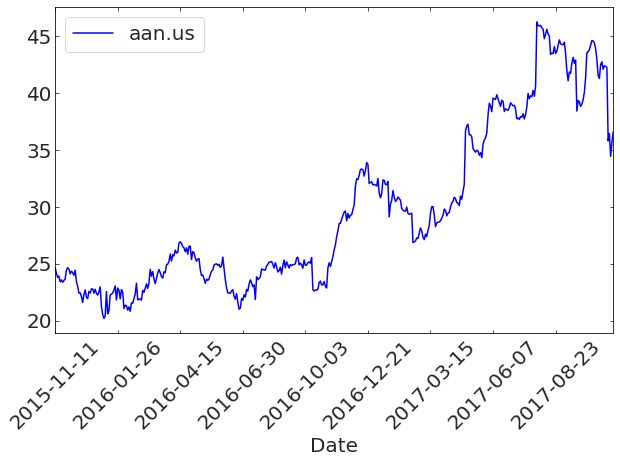

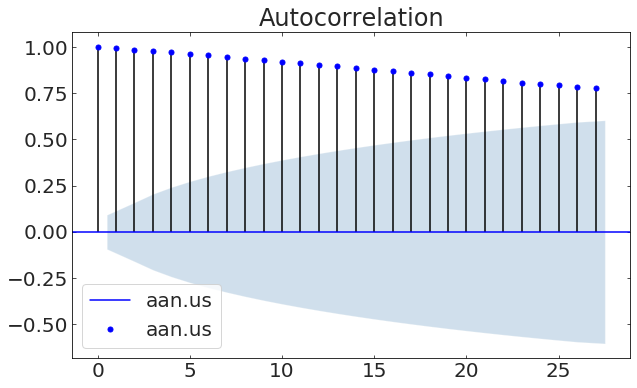

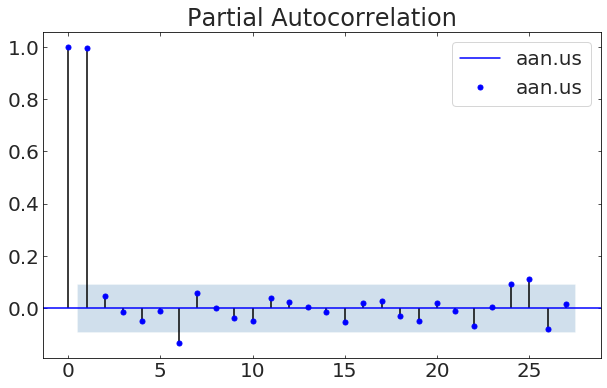

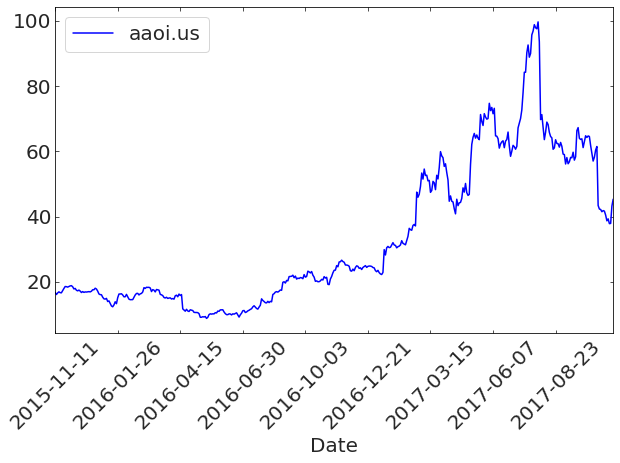

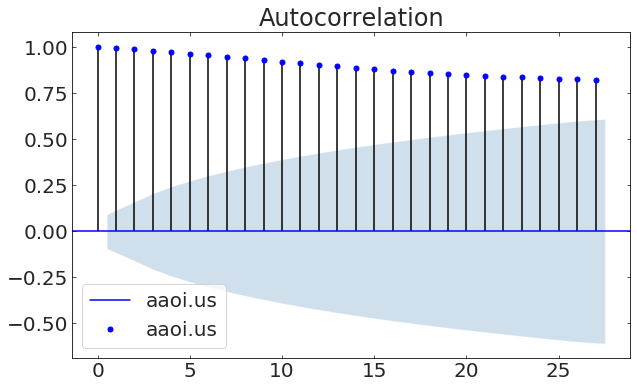

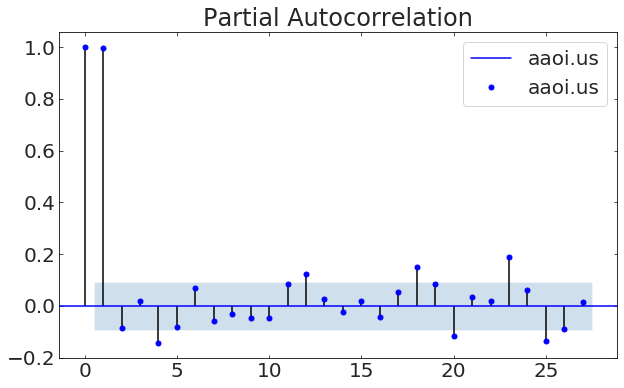

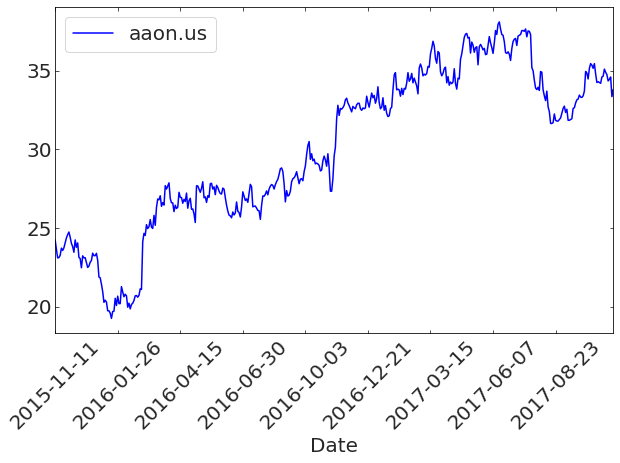

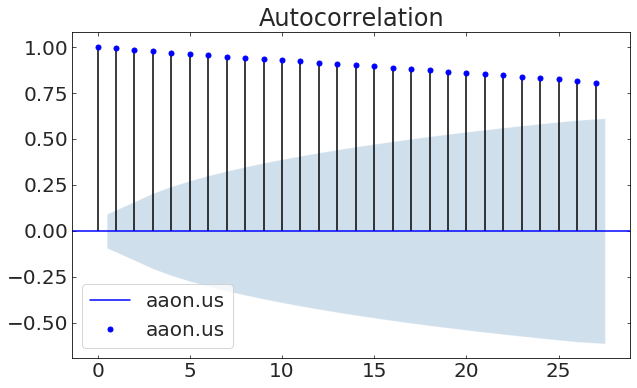

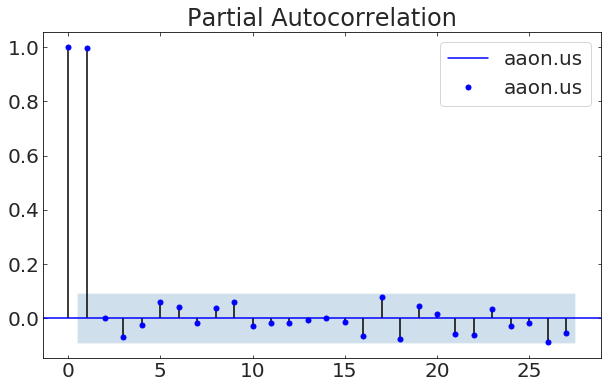

In [0]:
b = 0

for c in tss.columns:

  if statbool[b] == False:
    tss[c].plot(color='blue', label=str(c))
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    plot_acf(tss[c], color='blue', label=str(c))
    plt.title('Autocorrelation')
    plt.legend()
    plt.show()

    plot_pacf(tss[c], color='blue', label=str(c))
    plt.title('Partial Autocorrelation')
    plt.legend()
    plt.show()

  if statbool[b] == True:
    tss[c].plot(c='red', label=str(c))
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    plot_acf(tss[c], color='red', label=str(c))
    plt.title('Autocorrelation')
    plt.legend()
    plt.show()

    plot_pacf(tss[c], color='red', label=str(c))
    plt.title('Partial Autocorrelation')
    plt.legend()
    plt.show()

  b += 1

# ARMA Modeling/Fitting

In this section, we will use the ARMA (AutoRegressive Moving Average) model to fit the sole stationary series in our dataframe by following these steps:



1.   Find the model hyperparameters p (for AR) and q (for MA) that minimize the Akaike Information Criterion, which estimates out-of-sample prediction error.
2.   Fit the data using the ARMA(p,q) model with the hyperparameter values found in step 1. 
3.   Plot the original series with its fit/forecast to compare



In [44]:
#Finding the minimum Akaiki Information Criterion (AIC) for a range of p & q
aics_st = np.zeros((5,5))
for p in range(5):
    for q in range(5):
      #Use try/except to avoid crashing when convergence fails for some values of p, q
      try:
        mod = sm.tsa.ARMA(tss[['aame.us']], (p,q)).fit()
        aics_st[p][q] = mod.aic

      except ValueError:
        aics_st[p][q] = np.nan

print(aics_st)
print("best parameters: p={}, q={}".format(int(np.where(aics_st == np.nanmin(aics_st))[0]), int(np.where(aics_st == np.nanmin(aics_st))[1])))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

[[ 522.01962759  106.2349101  -130.21340757 -245.70555257 -323.71484051]
 [-568.13070573 -594.11492188 -592.25827415 -590.43749486 -588.55361086]
 [-591.47273869 -592.27925171 -590.17488451 -588.4783452            nan]
 [-591.54668302 -590.38288675 -588.42529716 -593.83079986           nan]
 [-590.49404637 -588.51597313 -586.55835488 -591.46677606 -589.730587  ]]
best parameters: p=1, q=1


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [49]:
mod = sm.tsa.ARMA(tss[['aame.us']], (1,1)).fit() #Create the ARMA model using p=1, q=1

mod.summary() #Display model information

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Wed, 26 Feb 2020   AIC                           -594.115
Time:                        17:51:29   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     -5.576      0.000      -0.366      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            3.6958           +0.0000j            3.6958            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


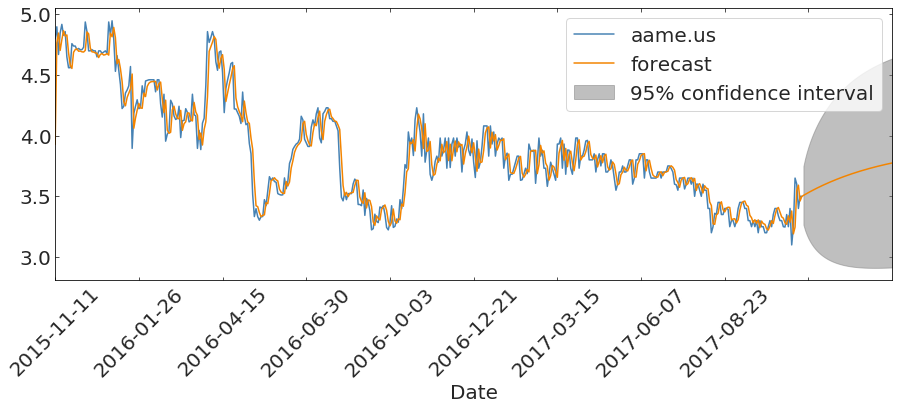

In [50]:
#Plotting forecast
ax = tss[['aame.us']].plot(figsize=(15,5))
mod.plot_predict(end=500, plot_insample=False, ax=ax)
plt.xticks(rotation=45)
plt.show()

Figure 4: Original 'aame.us' series in blue with its ARMA-forecasted series in orange. The grey area is the 95% confidence interval, which implies the forecast's uncertainty grows very quickly the further out you go. 

## Model Coefficients 


In [51]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Wed, 26 Feb 2020   AIC                           -594.115
Time:                        17:56:49   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     -5.576      0.000      -0.366      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            3.6958           +0.0000j            3.6958            0.0000
-----------------------------------------------------------------------------
"""

The coefficients of the best fit model are 0.9811 and -0.2706 for the Autoregressive and Moving Average components of the model, respectively. Note that our choice of p=1, q=1 results in both components having only one term, and therefore one coefficient each. The Autoregressive coefficient tells us how much memory the time series has of itself, for a time lag of 1 day in this case. The moving average coefficient tells us how much of the (Gaussian) noise is subtracted from the time series.

#  ARIMA Modelling/Fitting

This section will repeat the process used in the ARMA modelling section, but using two non-stationary timeseries that are not highly correlated. The ARMA model would fail to converge using non-stationary timeseries, but the "Integrative" term in the ARIMA model introduces differencing to create stationarity. 



In [84]:
tss.corr()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us,aaon.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239,0.809409
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459,0.809966
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427,0.503524
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059,0.755263
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147,-0.876358
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505,0.671816
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166,0.853182
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371,-0.612453
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847,0.765596
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000,0.780400


aac.us and aaap.us are both non-stationary series (as previously shown) and have a reasonable low correlation (-0.423). We will choose d=1 for the order of integration to start with, meaning the variables will only be differenced once. 

In [92]:
aics_nonst = np.zeros((5,5))
for p in range(5):
  for q in range(5):
    
    try:
      mod2 = sm.tsa.ARIMA(tss[['aaap.us']], (p,1,q)).fit()
      aics_nonst[p][q] = mod2.aic

    except ValueError:
      aics_nonst[p][q] = np.nan

print(aics_nonst)
#print(np.where(aics_nonst == np.nanmin(aics_nonst)))
print("best parameters: p={}, q={}".format(int(np.where(aics_nonst == np.nanmin(aics_nonst))[0]), 
                                                 int(np.where(aics_nonst == np.nanmin(aics_nonst))[1])))
                                                 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

[[1461.97068291 1457.17581822 1458.92029397 1456.78798628 1458.49133817]
 [1457.74483163 1459.0824408            nan           nan           nan]
 [1458.05587286 1457.37635098 1461.4391886            nan           nan]
 [1456.06683458 1457.61624417 1454.76383696 1448.3755667            nan]
 [1457.64668308 1459.55761199 1449.80253838 1446.82620155 1474.11205094]]
best parameters: p=4, q=3


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [94]:
#Fitting model using p=4, d=1, q=3 
mod2 = sm.tsa.ARIMA(tss[['aaap.us']], (4,1,3)).fit()
mod2.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.aaap.us   No. Observations:                  446
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -714.413
Method:                       css-mle   S.D. of innovations              1.200
Date:                Wed, 26 Feb 2020   AIC                           1446.826
Time:                        20:30:36   BIC                           1483.729
Sample:                             1   HQIC                          1461.376
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1594      0.114      1.400      0.162      -0.064       0.383
ar.L1.D.aaap.us    -0.4535      0.102     -4.467      0.000      -0.653      -0.255
ar.L2.D.aaap.us     0.2600      0.057      4.542      0.000       0.148       0.372
ar.L3.D.aaap.us     0.9747      0.057     17.188      0.000       0.864       1.086
ar.L4.D.aaap.us     0.1333      0.059      2.258      0.024       0.018       0.249
ma.L1.D.aaap.us     0.3476      0.091      3.801      0.000       0.168       0.527
ma.L2.D.aaap.us    -0.3325      0.067     -4.998      0.000      -0.463      -0.202
ma.L3.D.aaap.us    -0.8492      0.072    -11.866      0.000      -0.989      -0.709
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0236           -0.0000j            1.0236           -0.0000
AR.2           -0.6753           -0.7702j            1.0243           -0.3646
AR.3           -0.6753           +0.7702j            1.0243            0.3646
AR.4           -6.9836           -0.0000j            6.9836           -0.5000
MA.1            1.0548           -0.0000j            1.0548           -0.0000
MA.2           -0.7232           -0.7703j            1.0566           -0.3700
MA.3           -0.7232           +0.7703j            1.0566            0.3700
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


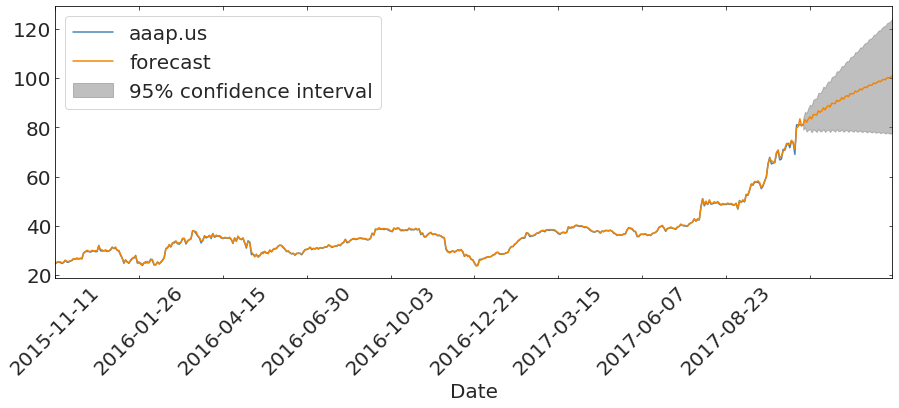

In [97]:
#Plotting forecast
ax = tss['aaap.us'].plot(figsize=(15,5))
   
mod2.plot_predict(end=500, plot_insample=False, ax=ax)
plt.xticks(rotation=45)
plt.show()

Some weird oscillations in the forecast for 'aaap.us', perhaps due to the higher number of terms in the ARIMA(4,1,3) model

In [98]:
aics_nonst = np.zeros((5,5))
for p in range(5):
  for q in range(5):
     
    try:
      mod2 = sm.tsa.ARIMA(tss[['aac.us']], (p,1,q)).fit()
      aics_nonst[p][q] = mod2.aic

    except ValueError:
      aics_nonst[p][q] = np.nan

print(aics_nonst)
#print(np.where(aics_nonst == np.nanmin(aics_nonst)))
print("best parameters: p={}, q={}".format(int(np.where(aics_nonst == np.nanmin(aics_nonst))[0]), 
                                                 int(np.where(aics_nonst == np.nanmin(aics_nonst))[1])))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

[[916.85257307 918.63728205 919.92892108 921.92641796 923.07037451]
 [918.61961626          nan          nan          nan          nan]
 [919.88534497 919.03545774 916.77130349          nan          nan]
 [921.84089276 921.00462073 920.97589734          nan          nan]
 [923.31346536 922.10068418 923.86551298 916.44859537          nan]]
best parameters: p=4, q=3


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [99]:
#Fitting model using p=4, d=1, q=3 
mod2 = sm.tsa.ARIMA(tss[['aac.us']], (4,1,3)).fit()
mod2.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.aac.us   No. Observations:                  446
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -449.224
Method:                       css-mle   S.D. of innovations              0.659
Date:                Wed, 26 Feb 2020   AIC                            916.449
Time:                        20:44:04   BIC                            953.351
Sample:                             1   HQIC                           930.999
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0249      0.034     -0.724      0.469      -0.092       0.043
ar.L1.D.aac.us    -0.0233      0.112     -0.208      0.835      -0.243       0.196
ar.L2.D.aac.us    -0.2200      0.076     -2.878      0.004      -0.370      -0.070
ar.L3.D.aac.us    -0.8230      0.091     -9.065      0.000      -1.001      -0.645
ar.L4.D.aac.us     0.0798      0.049      1.627      0.104      -0.016       0.176
ma.L1.D.aac.us     0.0369      0.103      0.357      0.721      -0.165       0.239
ma.L2.D.aac.us     0.2980      0.085      3.492      0.001       0.131       0.465
ma.L3.D.aac.us     0.8565      0.103      8.278      0.000       0.654       1.059
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4180           -0.9446j            1.0329           -0.1837
AR.2            0.4180           +0.9446j            1.0329            0.1837
AR.3           -1.1095           -0.0000j            1.1095           -0.5000
AR.4           10.5806           -0.0000j           10.5806           -0.0000
MA.1            0.4098           -0.9122j            1.0000           -0.1828
MA.2            0.4098           +0.9122j            1.0000            0.1828
MA.3           -1.1675           -0.0000j            1.1675           -0.5000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


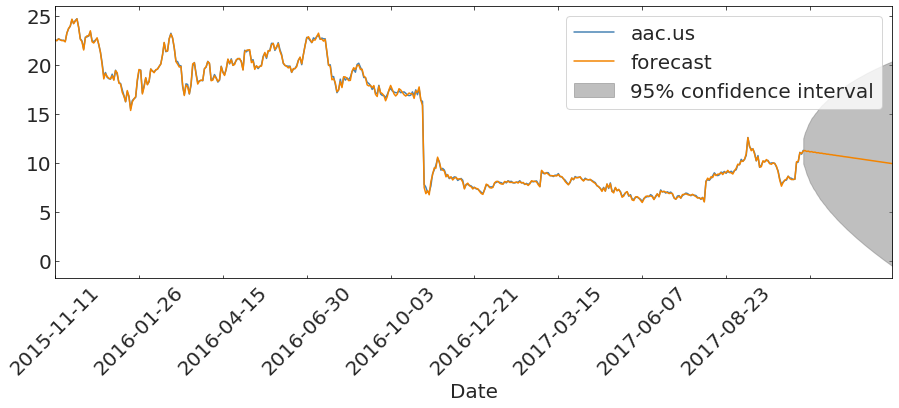

In [100]:
ax = tss['aac.us'].plot(figsize=(15,5))
   
mod2.plot_predict(end=500, plot_insample=False, ax=ax)
plt.xticks(rotation=45)
plt.show()

Finally, we'll refit one of the non-stationary series using d=2 for the order of integration and compare:

In [101]:
aics_nonst = np.zeros((5,5))
for p in range(5):
  for q in range(5):
     
    try:
      mod2 = sm.tsa.ARIMA(tss[['aac.us']], (p,2,q)).fit()
      aics_nonst[p][q] = mod2.aic

    except ValueError:
      aics_nonst[p][q] = np.nan

print(aics_nonst)
#print(np.where(aics_nonst == np.nanmin(aics_nonst)))
print("best parameters: p={}, q={}".format(int(np.where(aics_nonst == np.nanmin(aics_nonst))[0]), 
                                                 int(np.where(aics_nonst == np.nanmin(aics_nonst))[1])))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

[[1213.75570504  923.35182631  925.1156531            nan           nan]
 [1082.50147283  925.09573105  925.34754475  925.45718343  927.41368289]
 [1041.44056996  926.32126338  925.49322044  927.07712142  927.86363607]
 [1010.72972259  928.28788562  927.47063121  928.71415293  924.54488058]
 [1008.42374011  929.71767686  928.51150318  930.28504564  929.91596671]]
best parameters: p=0, q=1


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


This time we got p=0, q=2 for our AR and MA hyperparameters (which were p=4 and q=3 for d=1)

In [102]:
mod3 = sm.tsa.ARIMA(tss[['aac.us']], (0,2,1)).fit()
mod3.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D2.aac.us   No. Observations:                  445
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -458.676
Method:                       css-mle   S.D. of innovations              0.674
Date:                Wed, 26 Feb 2020   AIC                            923.352
Time:                        20:46:44   BIC                            935.646
Sample:                             2   HQIC                           928.200
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002      0.000      0.744      0.457      -0.000       0.001
ma.L1.D2.aac.us    -1.0000      0.007   -140.972      0.000      -1.014      -0.986
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

Here, our only coefficient other than the constant is the Moving Average coefficient. The minimization of AIC indicates the model performs best when Autoregression is not performed, but it was performed when our order of integration was set to 1. Perhaps the combination of repeated differenceing AND autoregression results is "overkill" and results in poor model performance. 

The model still performs the moving average to account for noise, which is not reduced by the integrative differencing. 

The MA coefficient is also exactly -1.0, not sure if this is significant or not.

**-->the # of coefficient equals the sum of p and q + 1, higher d mean higher complexity. And d=2 give the different prediction than d=1 (price going up and going down), you should pay more attention when you analyze the results and summerize the discussion**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


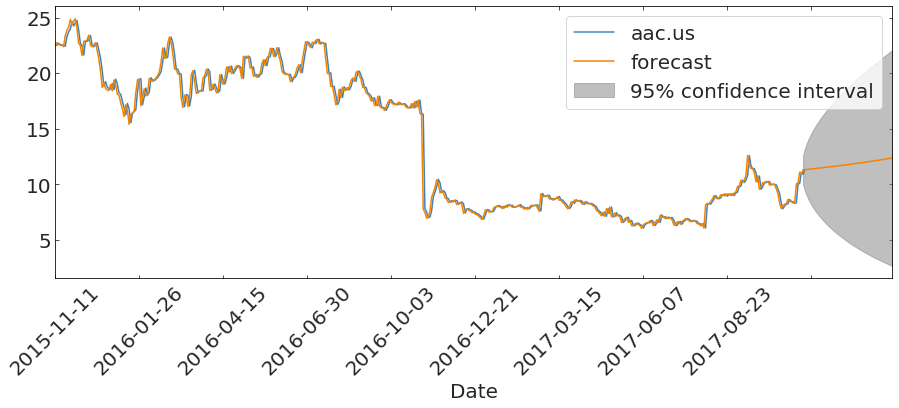

In [103]:
ax = tss['aac.us'].plot(figsize=(15,5))
   
mod3.plot_predict(end=500, plot_insample=False, ax=ax)
plt.xticks(rotation=45)
plt.show()

**-->always remember no caption no score!!!**